<h1>Traml Slider Demo</h1>
<h3>Single film of AZO on SLG substrate</h3>

In [20]:
%pylab inline
import os, sys
sys.path.append("../")
import traml #TMM script
import db

Populating the interactive namespace from numpy and matplotlib


In [21]:
a = traml.Stack() #create new stack object, default SLG substrate

In [22]:
a.library.search('ZnO') #search for a ZnO film as an example

|     ID | SHELF   | BOOK   | PAGE     | DESCRIPTION                    |
|--------+---------+--------+----------+--------------------------------|
| 112001 | main    | ZnO    | Bond-o   | Bond et al. 1965: n(o) 0.45-4. |
| 112002 | main    | ZnO    | Bond-e   | Bond et al. 1965: n(e) 0.45-4. |
| 401401 | other   | Al:ZnO | Treharne | Treharne et al. 2011: Thin fil |


In [23]:
a.add(401401) #Add the Al:ZnO layer
a.table()

|   # |     ID | Material   | Thickness (nm)   | Type      |
|-----+--------+------------+------------------+-----------|
|   0 | 301005 | soda-lime  | --               | substrate |
|   1 | 401401 | Al:ZnO     | 100              | passive   |


In [24]:
def getTR(stack):
    '''Get T and R for stack'''
    T = stack.get_T()
    R = stack.get_R()
    x = stack.x
    return x, real(T), real(R)

In [25]:
def plot(d):
    '''Plot T and R for a stack with a single film of thickness d'''
    
    fig = figure(figsize(9,5))
    ax = fig.add_subplot(111)
    
    stack = a
    stack.d(1, d) #change layer 1 thickness
    x, T, R = getTR(a) 
    
    ax.plot(x, T, color='red', linewidth=3)
    ax.plot(x, R, color='blue', linewidth=3)
    ax.set_xlim([min(x), max(x)])
    ax.set_ylim([0,1])
    ax.set_xlabel('$\lambda$ ($\mu$m)', fontsize=20)
    ax.set_ylabel('T, R', fontsize=20)
    
    
    

<h1>Traml Slider Demo</h1>
<h3>Single film of AZO on SLG substrate</h3>

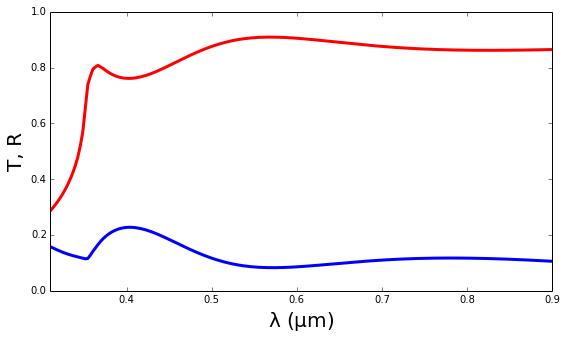

In [26]:
from ipywidgets import *
d_s = FloatSlider(min=0, max=1000, step=5, value = 0)
interactive(plot,a=a,d=d_s)